In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library
from sklearn import svm

In [11]:
dataset = pd.read_csv("cars.csv")
dataset.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [12]:
# Finding all the columns with NULL values
dataset.isna().sum()
# Drop the rows with missing values
dataset = dataset.dropna()

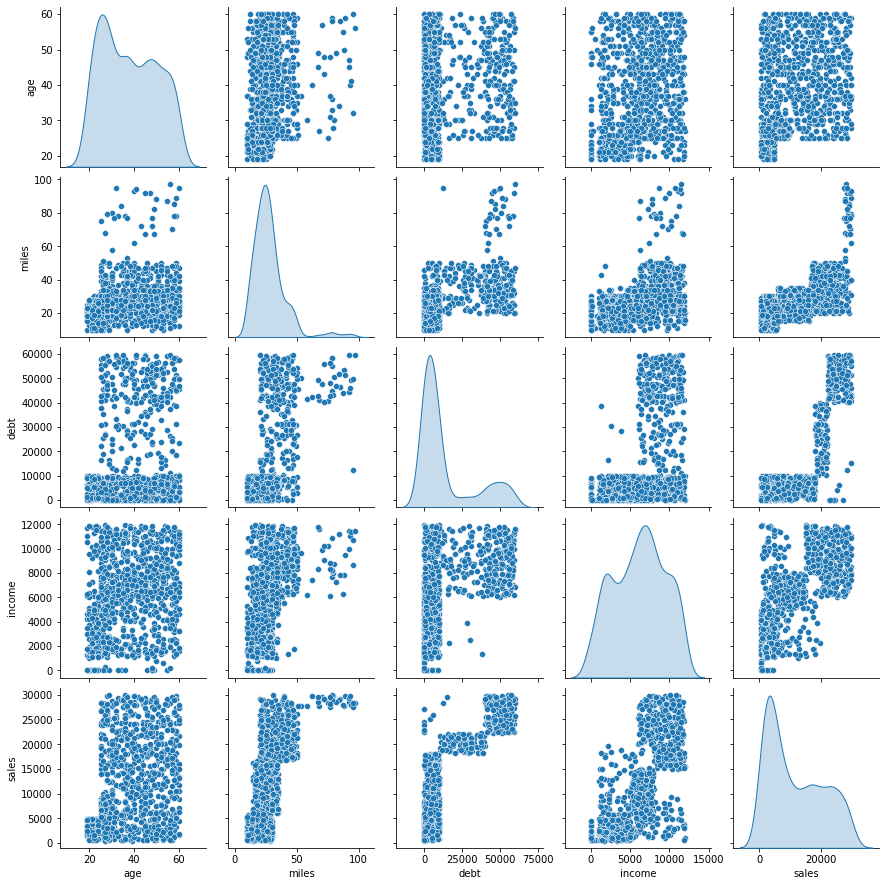

In [5]:
sns.pairplot(dataset[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
# Calculating basic statistics with the train data
train_stats = train_dataset.describe()
train_stats.pop("sales") # excluding the dependent variable
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,770.0,38.059740,12.213385,19.0,27.00,37.0,48.00,60.0
gender,770.0,0.500000,0.500325,0.0,0.00,0.5,1.00,1.0
miles,770.0,28.181818,13.753474,10.0,20.00,26.0,33.00,97.0
debt,770.0,14595.523377,18638.179018,0.0,1484.75,6396.0,19057.25,59770.0
income,770.0,6250.881818,3249.404480,0.0,3730.00,6500.0,8711.75,11970.0


In [8]:
# Creating the normalizing function with mean and standard deviation
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [9]:
train_labels = train_dataset.pop("sales") # using .pop function to store only the dependent variable
test_labels = test_dataset.pop("sales")
x_train=normed_train_data
x_test=normed_test_data
y_train=train_labels
y_test=test_labels

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
#Prediction using test set 
y_pred = lin_reg.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)


In [ ]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(x_train,y_train)
#Predicting using test set 
y_pred = dt_regressor.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(x_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

In [ ]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred_svm=regressor.predict(x_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)